## OBJECTIVE: 
### Apply Dimensionality Reduction Technique - PCA and train a model using Principal Components instead of training model using raw data

# Attribute Information:

###### ATTRIBUTES

1. COMPACTNESS (average perim)**2/area

2. CIRCULARITY (average radius)**2/area

3. DISTANCE CIRCULARITY area/(av.distance from border)**2

4. RADIUS RATIO (max.rad-min.rad)/av.radius

5. PR.AXIS ASPECT RATIO (minor axis)/(major axis)

6. MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length)

7. SCATTER RATIO (inertia about minor axis)/(inertia about major axis)

8. ELONGATEDNESS area/(shrink width)**2

9. PR.AXIS RECTANGULARITY area/(pr.axis length*pr.axis width)

10. MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)

11. SCALED VARIANCE (2nd order moment about minor axis)/area
ALONG MAJOR AXIS

12. SCALED VARIANCE.1 (2nd order moment about major axis)/area
ALONG MINOR AXIS

13. SCALED RADIUS OF GYRATION (mavar+mivar)/area

14. SCALED RADIUS OF GYRATION.1

15. SKEWNESS ABOUT

16. SKEWNESS ABOUT1 (3rd order moment about major axis)/sigma_min**3
MAJOR AXIS

17. SKEWNESS ABOUT2 (3rd order moment about minor axis)/sigma_maj**3
MINOR AXIS

18. HOLLOWS RATIO (area of hollows)/(area of bounding polygon)

19. CLASS (CLASS OF VEHICLE: CAR, VAN, BUS)



In [191]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [192]:
#Loading the dataset and storing in dataframe
vehicle_df = pd.read_csv('vehicle-2.csv')

In [193]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [194]:
#Checking Width and Depth of the Data
vehicle_df.shape

(846, 19)

In [195]:
#Finding Datatypes of Each Attribute in the data
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [196]:
#Analysing the Class Counts on  basis of  target variable: 'class' of vehicle
vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [197]:
#Checking and Analysing Object Type Data 
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [198]:
#Checking for NUll Values in the dataframe..
vehicle_df.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

###### So, there are null values in the dataframe. 
Following Attributes have Null Vlues in dataframe.
1. circularity
2. distance_circularity
3. radius_ratio
4. pr.axis_aspect_ratio
5. scatter_ratio
6. elongatedness
7. pr.axis_rectangularity
8. scaled_variance
9. scaled_variance.1
10. scaled_radius_of_gyration
11. scaled_radius_of_gyration.1
12. skewness_about
13. skewness_about.1
14. skewness_about.2                
###### 14  Attributes in the dataset have null values

In [199]:
#Plotting Pie Chart and Count Plot for Term Deposit
figure,ax = plt.subplots(1,2,figsize=(15,7))
labels =['Car', 'Bus', 'Van']
ax[0].set_title("Deposit Distribution Pie")
vehicle_df['class'].value_counts().plot.pie(ax = ax[0], labels =['Car', 'Bus', 'Van'], autopct='%1.1f%%', colors = ['#176BB8', '#F6E708', '#ED1515'])
plt.title('Vehicle Class Index')
plt.legend(labels,loc=3)
sns.countplot(vehicle_df['class'], ax = ax[1], palette = ['#ED1515', '#176BB8', '#F6E708'])
ax[1].set_xticklabels(['Van', 'Car', 'Bus'])
vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

###### So, we have 429 cars (Saab 9000 and Opel Manta 400) in total. 
###### 218 Doble Decker Buses
###### and 199 Chevrolet Vans

In [200]:
#Object type Data cannot be handled by Algorithms. Changing the target variable type to 'Category'.
#Mapping the yes and no values to '0' and '1'
vehicle_df['class'] = vehicle_df['class'].astype('category')
vehicle_df['class'] = vehicle_df['class'].replace(['car'], 1)
vehicle_df['class'] = vehicle_df['class'].replace(['bus'], 2)
vehicle_df['class'] = vehicle_df['class'].replace(['van'], 3)
vehicle_df['class'].value_counts()

1    429
2    218
3    199
Name: class, dtype: int64

In [201]:
# Defining Features and Target:
vehiclef_df = vehicle_df.drop(["class"],axis=1)
class_df = vehicle_df["class"]

In [202]:
vehiclef_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

You should consider upgrading via the 'pip install --upgrade pip' command.


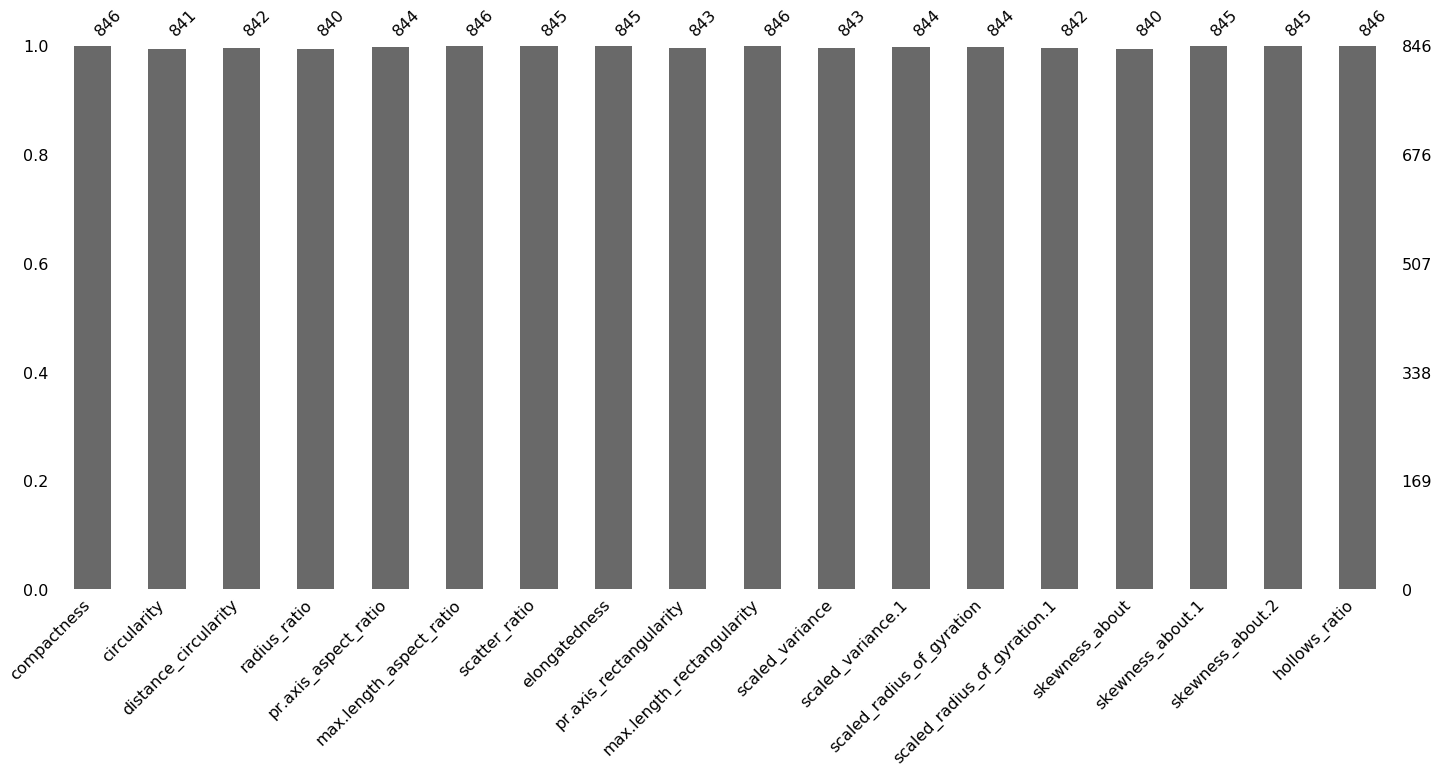

In [203]:
!pip install missingno
import missingno as msno
msno.bar(vehiclef_df)

14 columns out of 18 features have missing values. Total no. of value each column has is indicated at the top of each bar. We need to address these missing values

In [204]:
# Handling Nulls: Replacing Nulls by mean value 
def remove_nulls(df_in, col_name):
    df_in[col_name].fillna((df_in[col_name].mean()), inplace=True)
    return df_in
clean_vehicle = remove_nulls(vehiclef_df, 'compactness')
clean_vehicle = remove_nulls(vehiclef_df, 'circularity')
clean_vehicle = remove_nulls(vehiclef_df, 'distance_circularity')
clean_vehicle = remove_nulls(vehiclef_df, 'radius_ratio')
clean_vehicle = remove_nulls(vehiclef_df, 'pr.axis_aspect_ratio')
clean_vehicle = remove_nulls(vehiclef_df, 'scatter_ratio')
clean_vehicle = remove_nulls(vehiclef_df, 'elongatedness')
clean_vehicle = remove_nulls(vehiclef_df, 'pr.axis_rectangularity')
clean_vehicle = remove_nulls(vehiclef_df, 'max.length_rectangularity')
clean_vehicle = remove_nulls(vehiclef_df, 'scaled_variance')
clean_vehicle = remove_nulls(vehiclef_df, 'scaled_variance.1')
clean_vehicle = remove_nulls(vehiclef_df, 'scaled_radius_of_gyration')
clean_vehicle = remove_nulls(vehiclef_df, 'scaled_radius_of_gyration.1')
clean_vehicle = remove_nulls(vehiclef_df, 'skewness_about')
clean_vehicle = remove_nulls(vehiclef_df, 'skewness_about.1')
clean_vehicle = remove_nulls(vehiclef_df, 'skewness_about.2')
clean_vehicle = remove_nulls(vehiclef_df, 'hollows_ratio')

In [205]:
clean_vehicle.isnull().sum().sum()

0

Null Values treated

###### Handling Outliers: Plotting Coluns with Outliers.

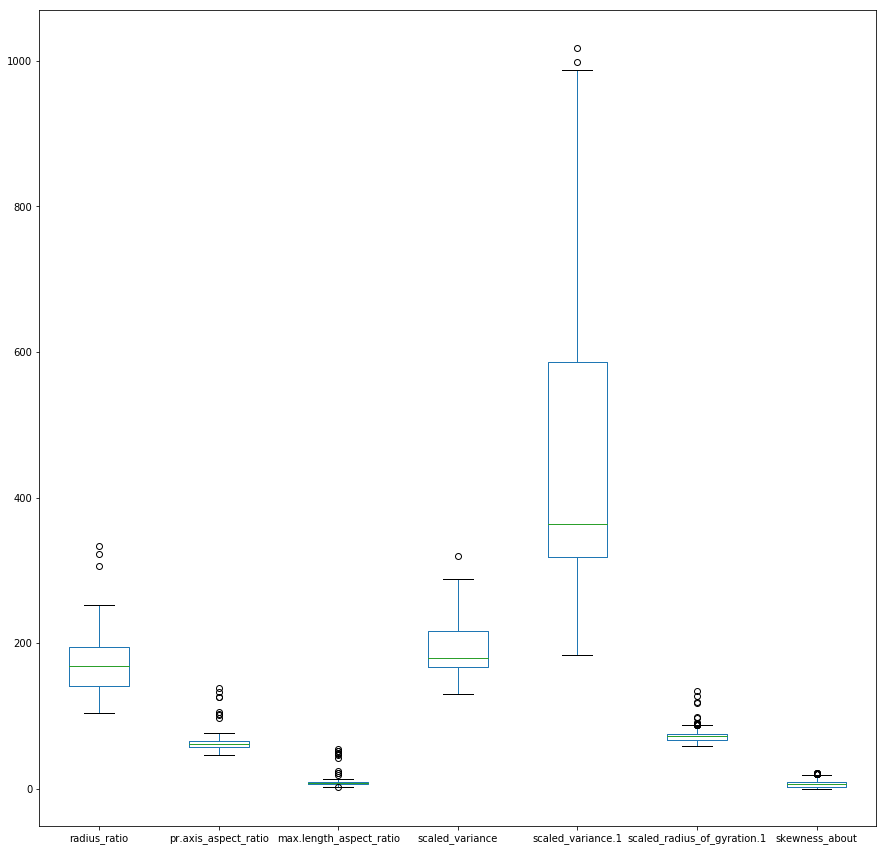

In [206]:
# Plotting the Columns with Outliers
plt.figure(figsize = (15, 15))
boxplot = vehiclef_df.boxplot(column=['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about'], grid = False)

In [235]:
# Handling Outliers using IQR method

def handle_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print('IQR lower bound and upper bound of', col_name, 'is', fence_low, 'and', fence_high, 'respectively')
    df_in.loc[df_in[col_name] > fence_high, col_name] = df_in[col_name].median()
    return df_in
clean_vehicle2 = handle_outlier(clean_vehicle, 'compactness')
clean_vehicle2 = handle_outlier(clean_vehicle, 'circularity')
clean_vehicle2 = handle_outlier(clean_vehicle, 'distance_circularity')
clean_vehicle2 = handle_outlier(clean_vehicle, 'radius_ratio')
clean_vehicle2 = handle_outlier(clean_vehicle, 'pr.axis_aspect_ratio')
clean_vehicle2 = handle_outlier(clean_vehicle, 'max.length_aspect_ratio')
clean_vehicle2 = handle_outlier(clean_vehicle, 'scatter_ratio')
clean_vehicle2 = handle_outlier(clean_vehicle, 'elongatedness')
clean_vehicle2 = handle_outlier(clean_vehicle, 'pr.axis_rectangularity')
clean_vehicle2 = handle_outlier(clean_vehicle, 'max.length_rectangularity')
clean_vehicle2 = handle_outlier(clean_vehicle, 'scaled_variance')
clean_vehicle2 = handle_outlier(clean_vehicle, 'scaled_variance.1')
clean_vehicle2 = handle_outlier(clean_vehicle, 'scaled_radius_of_gyration')
clean_vehicle2 = handle_outlier(clean_vehicle, 'scaled_radius_of_gyration.1')
clean_vehicle2 = handle_outlier(clean_vehicle, 'skewness_about')
clean_vehicle2 = handle_outlier(clean_vehicle, 'skewness_about.1')
clean_vehicle2 = handle_outlier(clean_vehicle, 'skewness_about.2')
clean_vehicle2 = handle_outlier(clean_vehicle, 'hollows_ratio')
print('outliers handled successfully')


IQR lower bound and upper bound of compactness is 67.5 and 119.5 respectively
IQR lower bound and upper bound of circularity is 26.5 and 62.5 respectively
IQR lower bound and upper bound of distance_circularity is 28.0 and 140.0 respectively
IQR lower bound and upper bound of radius_ratio is 60.375 and 275.375 respectively
IQR lower bound and upper bound of pr.axis_aspect_ratio is 45.0 and 77.0 respectively
IQR lower bound and upper bound of max.length_aspect_ratio is 2.5 and 14.5 respectively
IQR lower bound and upper bound of scatter_ratio is 70.5 and 274.5 respectively
IQR lower bound and upper bound of elongatedness is 13.5 and 65.5 respectively
IQR lower bound and upper bound of pr.axis_rectangularity is 13.0 and 29.0 respectively
IQR lower bound and upper bound of max.length_rectangularity is 104.0 and 192.0 respectively
IQR lower bound and upper bound of scaled_variance is 92.375 and 291.375 respectively
IQR lower bound and upper bound of scaled_variance.1 is -83.375 and 987.625

In [208]:
clean_vehicle2.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                  61.0                      8.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                         72.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0          197.0  
1             189.0          199.0  
2             188.0          196.0  
3             199.0          207.0  
4             180.0          183.0

In [209]:
# Defining Features and Target:
feature = clean_vehicle2
target = vehicle_df["class"]

In [210]:
#Plotting Features HeatMap
corr = feature.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (12, 12))
sns.heatmap(corr, mask = mask,annot = True, square = True)

###### circularity, distance_circularity, scatter_ratio, elongatedness, pr.axis_rectangularity and scaled_variance are the dimensions that are highly correlated to each other. 
###### So we have a problem of multicollinearity here.
###### "multicollinearity" refers to predictors that are correlated with other predictors.  Multicollinearity occurs when your model includes multiple factors that are correlated not just to our response variable, but also to each other.
###### It can reduce our overall coefficient as well as our p-value (known as the significance value) and cause unpredictable variance. 
###### This will lead to overfitting where the model may do great on known training set but will fail at unknown testing set. 
###### As this leads to higher standard error with lower statistical significance value, multicollinearity makes it difficult to ascertain how important a feature is to the target variable. And with a lower significance value, we will fail to reject the null, which leads to type II error.

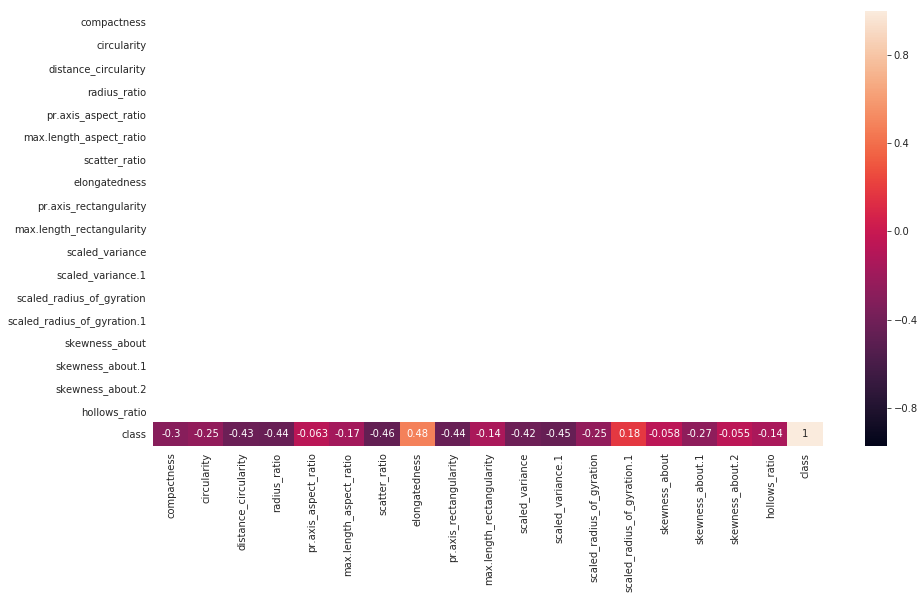

In [211]:
feature_target_corr = feature.join(target).corr()

mask = np.zeros((19, 19))
mask[:18, :] = 1

plt.figure(figsize=(15, 8))
with sns.axes_style("white"):
    sns.heatmap(feature_target_corr, annot=True, mask = mask)

Only elongatedness i s significantly correlated to 'class' of vehicle i.e. our target variable.

####  Performing EDA: 
##### Considering foll. Attributes for EDA:
1. circularity
2. distance_circularity
3. scatter_ratio
4. elongatedness
5. pr.axis_rectangularity

In [114]:
# concatenating features from cleaned dataframe and target column i.e. class from original dataframe  
complete_data = clean_vehicle2
complete_data['class'] = vehicle_df['class']
complete_data.shape


(846, 19)

###### Plottting Distributions of Attributes:

In [118]:
col_names = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio']

fig, ax = plt.subplots(len(col_names), figsize=(15, 20))

for i, col_val in enumerate(col_names):

    sns.distplot(clean_vehicle2[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

#### Circuarity:

In [78]:
#Understanding Distribution over 'Circularity Attribute'
clean_vehicle2['circularity'].describe().transpose()

count    846.000000
mean      44.828775
std        6.133943
min       33.000000
25%       40.000000
50%       44.000000
75%       49.000000
max       59.000000
Name: circularity, dtype: float64

In [107]:
#Plotting Distribution
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'circularity',  palette="rocket", data = complete_data)
ax.set_xlabel('circualrity', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('circularity', fontsize=25)
sns.despine()

Text(0.5, 0, 'circularity')

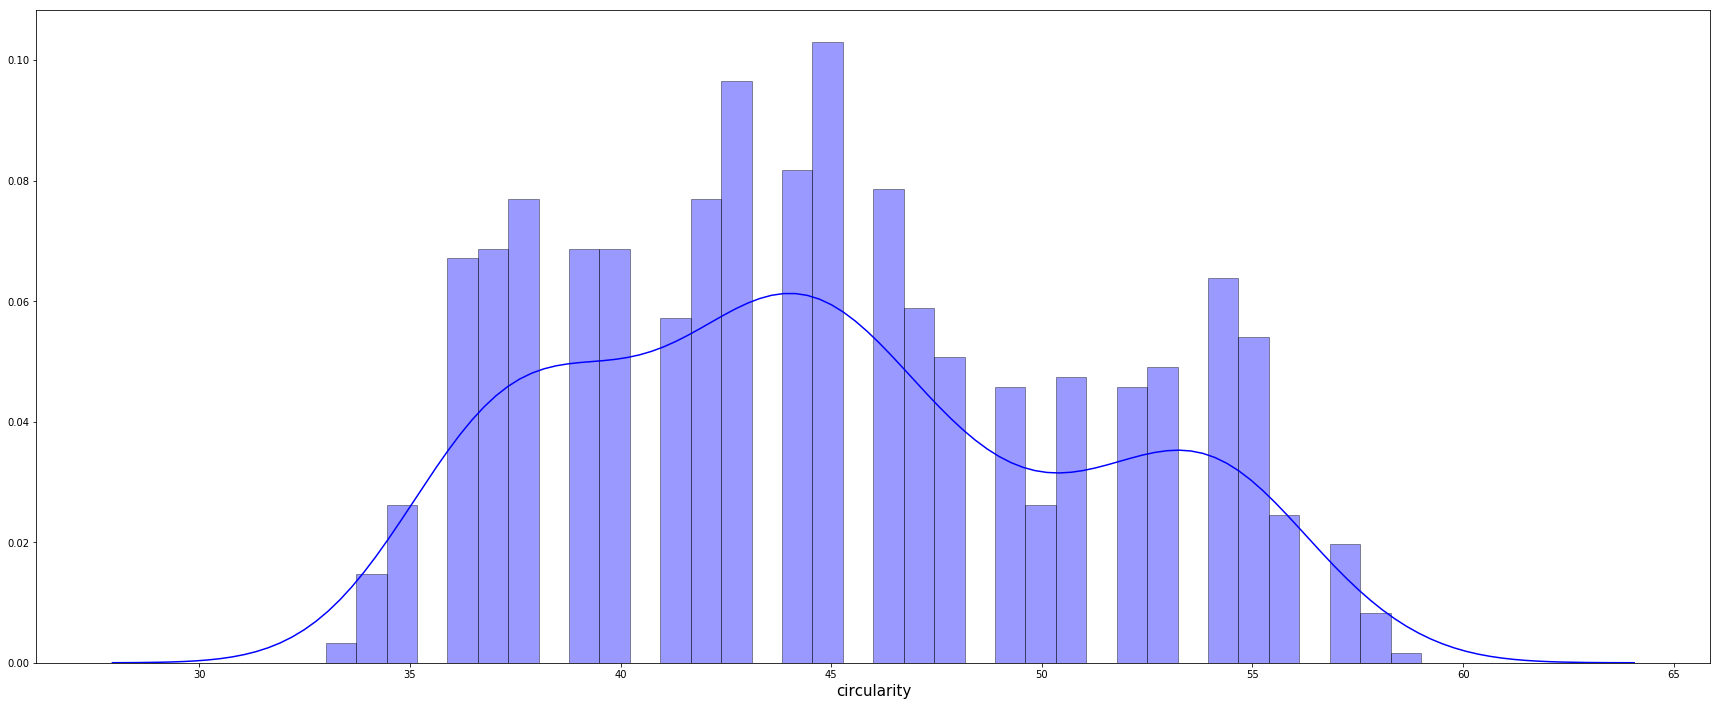

In [79]:
#Plotting Dist Plot of Circularity Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(clean_vehicle2['circularity'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('circularity', fontsize=15)


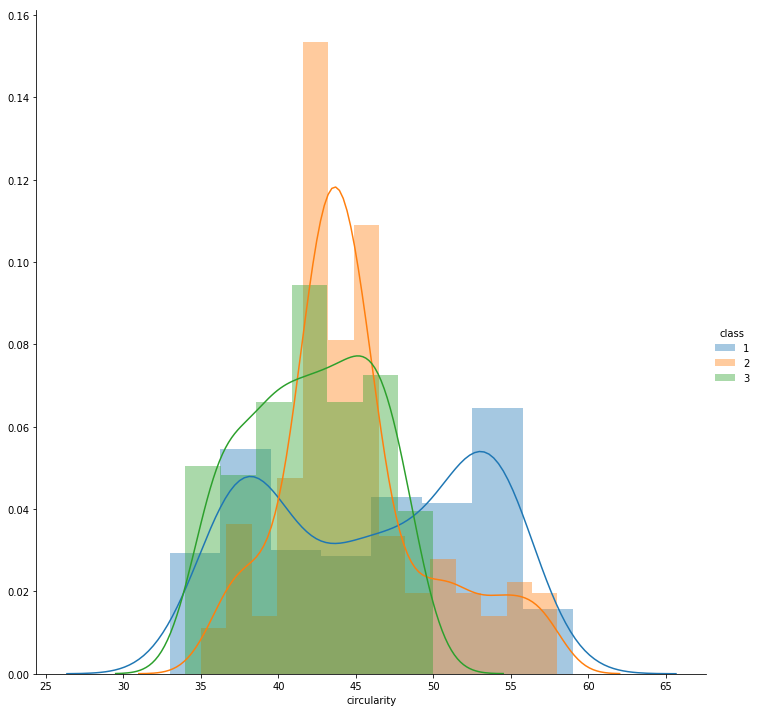

In [100]:
sns.FacetGrid(complete_data, hue = 'class', size = 10).map(sns.distplot, 'circularity').add_legend()

In [83]:
sns.jointplot(x = "circularity", y = "max.length_rectangularity", data = clean_vehicle2);

In [155]:
f, ax = plt.subplots(figsize = (10, 10))
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light = 1, reverse = True)
sns.kdeplot(clean_vehicle2['circularity'], clean_vehicle2['max.length_rectangularity'], cmap = cmap, n_levels = 60, shade=True)

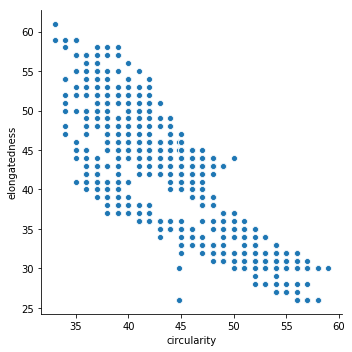

In [148]:
sns.relplot( x = "circularity", y = "elongatedness", data = clean_vehicle2);

#### distance_Circularity:

In [150]:
clean_vehicle2['distance_circularity'].describe()

count    846.000000
mean      82.110451
std       15.740902
min       40.000000
25%       70.000000
50%       80.000000
75%       98.000000
max      112.000000
Name: distance_circularity, dtype: float64

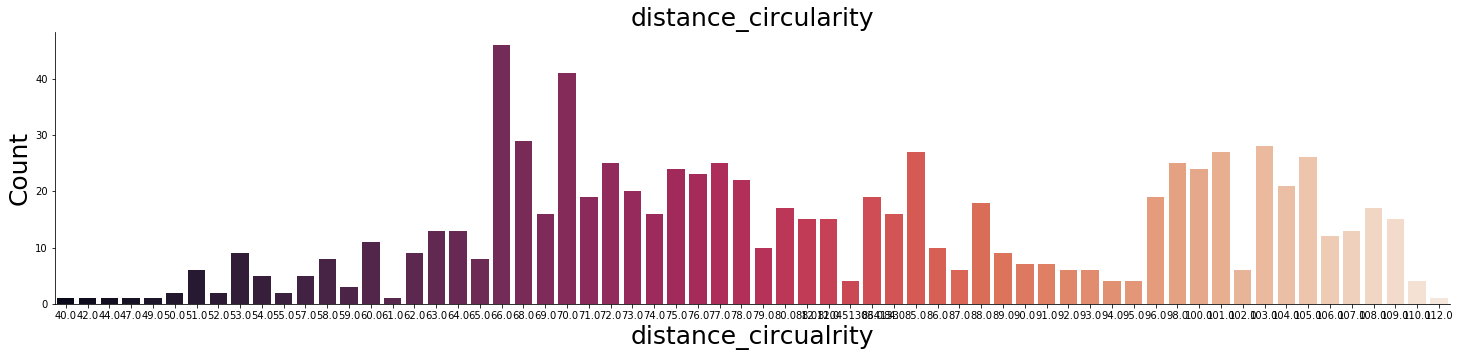

In [151]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'distance_circularity',  palette="rocket", data = complete_data)
ax.set_xlabel('distance_circualrity', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('distance_circularity', fontsize=25)
sns.despine()

In [152]:
#Plotting Dist Plot of Age Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(clean_vehicle2['distance_circularity'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('distance_circularity', fontsize=15)

Text(0.5, 0, 'distance_circularity')

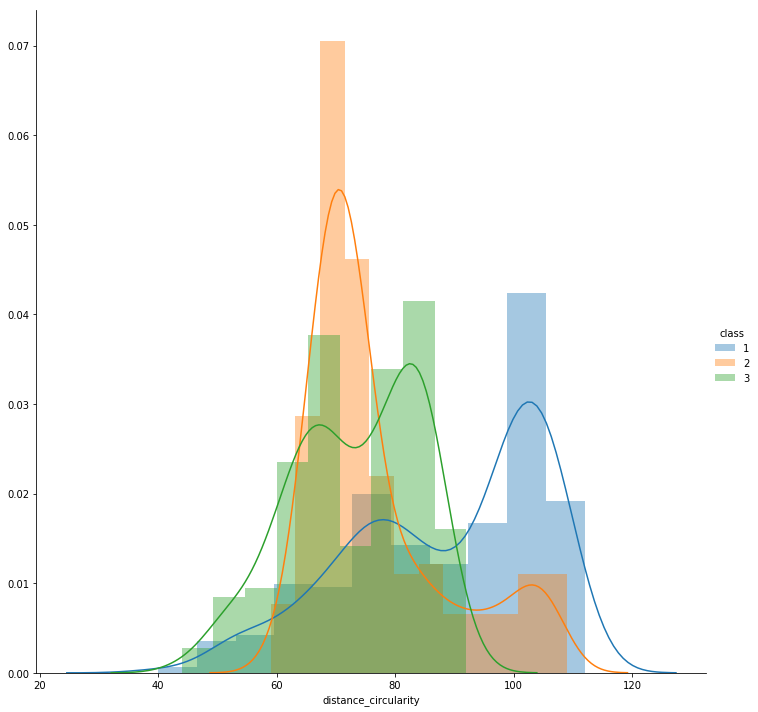

In [153]:
sns.FacetGrid(complete_data, hue = 'class', size = 10).map(sns.distplot, 'distance_circularity').add_legend()

Text(0, 0.5, 'elongatedness')

<Figure size 432x288 with 0 Axes>

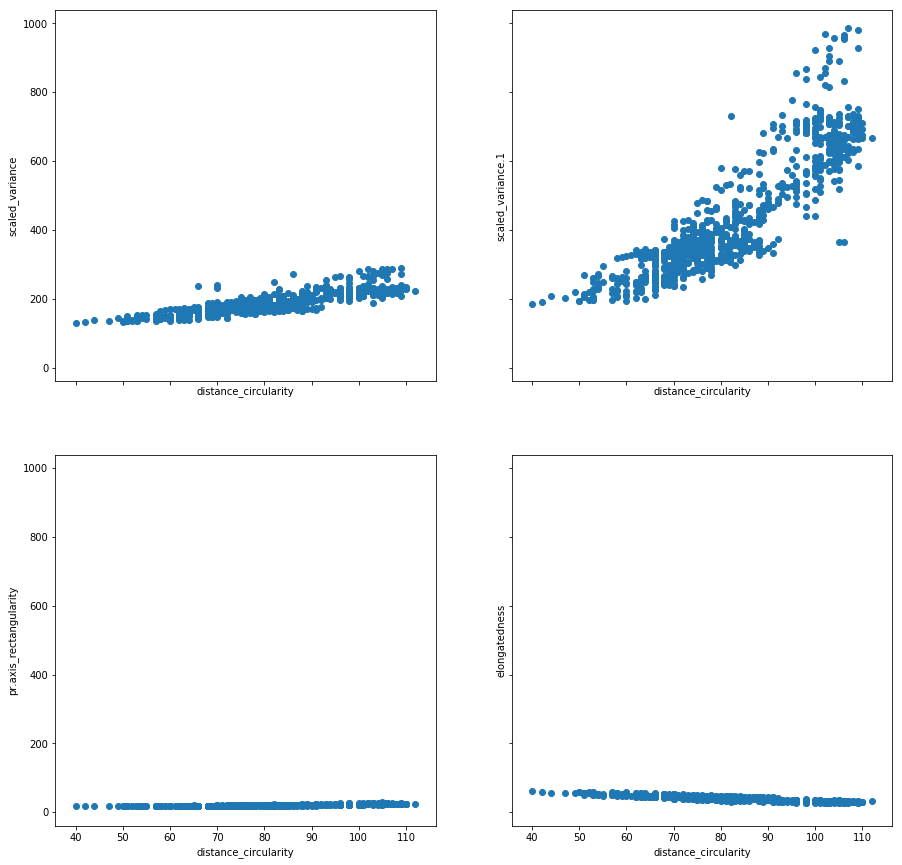

In [160]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True)
f.set_size_inches(15, 15)

axes[0][0].scatter(x = "distance_circularity", y = "scaled_variance", data = clean_vehicle2)
axes[0][0].set_xlabel('distance_circularity', labelpad = 5)
axes[0][0].set_ylabel('scaled_variance', labelpad = 5)

axes[0][1].scatter(x = "distance_circularity", y = "scaled_variance.1", data = clean_vehicle2)
axes[0][1].set_xlabel('distance_circularity', labelpad = 5)
axes[0][1].set_ylabel('scaled_variance.1', labelpad = 5)

axes[1][0].scatter(x = "distance_circularity", y = "pr.axis_rectangularity", data = clean_vehicle2)
axes[1][0].set_xlabel('distance_circularity')
axes[1][0].set_ylabel('pr.axis_rectangularity', labelpad = 5)


axes[1][1].scatter(x = "distance_circularity", y = "elongatedness", data = clean_vehicle2)
axes[1][1].set_xlabel('distance_circularity')
axes[1][1].set_ylabel('elongatedness', labelpad = 5)


##### Scatter_ratio

In [161]:
clean_vehicle2['scatter_ratio'].describe()

count    846.000000
mean     168.901775
std       33.195188
min      112.000000
25%      147.000000
50%      157.000000
75%      198.000000
max      265.000000
Name: scatter_ratio, dtype: float64

Text(0.5, 0, 'scatter_ratio')

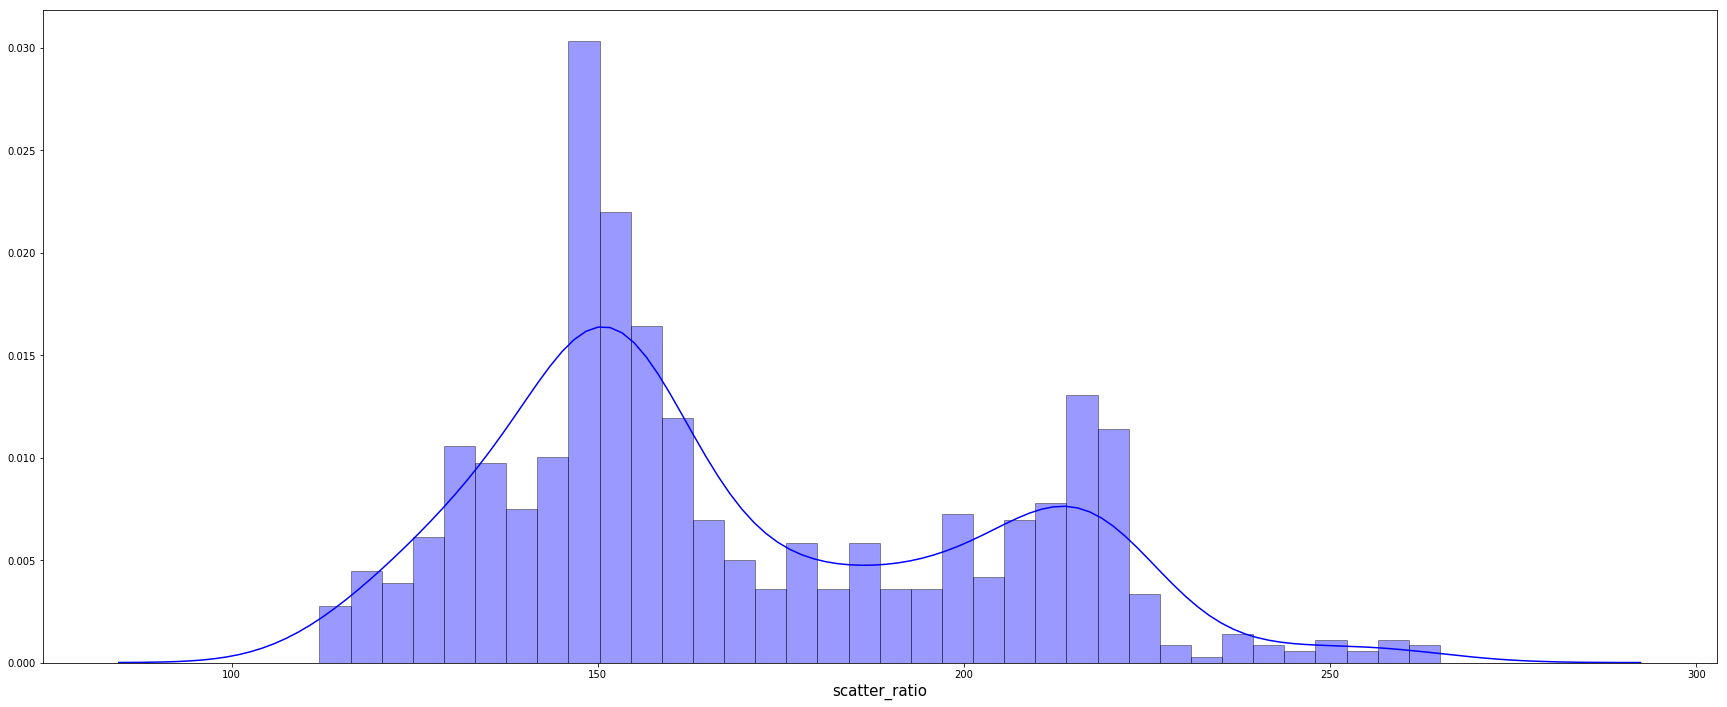

In [163]:
#Plotting Dist Plot of Age Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(clean_vehicle2['scatter_ratio'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('scatter_ratio', fontsize=15)

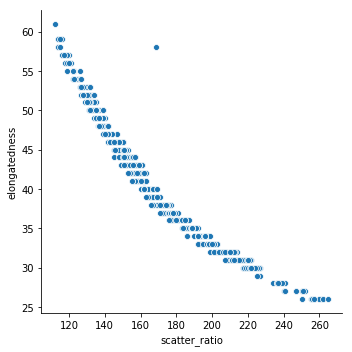

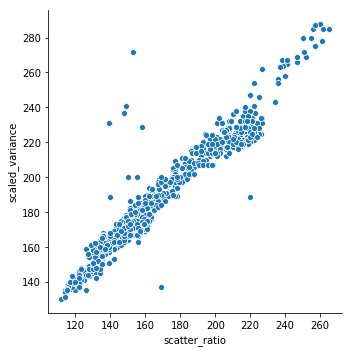

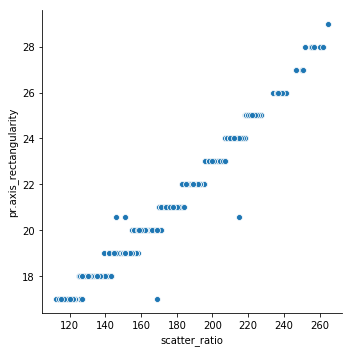

In [177]:
sns.relplot( x = "scatter_ratio", y = "elongatedness", data = clean_vehicle2);
sns.relplot( x = "scatter_ratio", y = "scaled_variance", data = clean_vehicle2);
sns.relplot( x = "scatter_ratio", y = "pr.axis_rectangularity", data = clean_vehicle2);


##### Elongatedness:

In [178]:
clean_vehicle2['elongatedness'].describe()

count    846.000000
mean      40.933728
std        7.811559
min       26.000000
25%       33.000000
50%       43.000000
75%       46.000000
max       61.000000
Name: elongatedness, dtype: float64

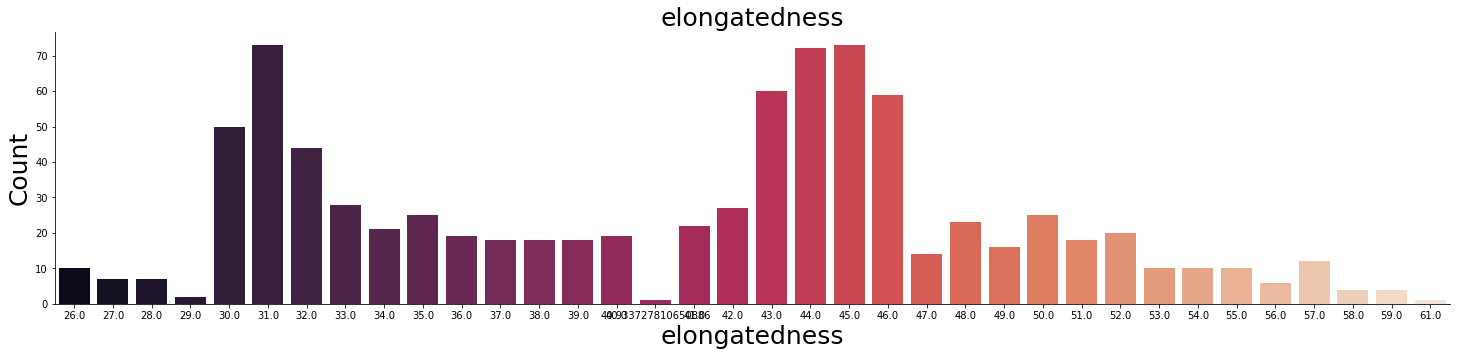

In [180]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'elongatedness',  palette="rocket", data = complete_data)
ax.set_xlabel('elongatedness', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('elongatedness', fontsize=25)
sns.despine()

Text(0.5, 0, 'elongatedness')

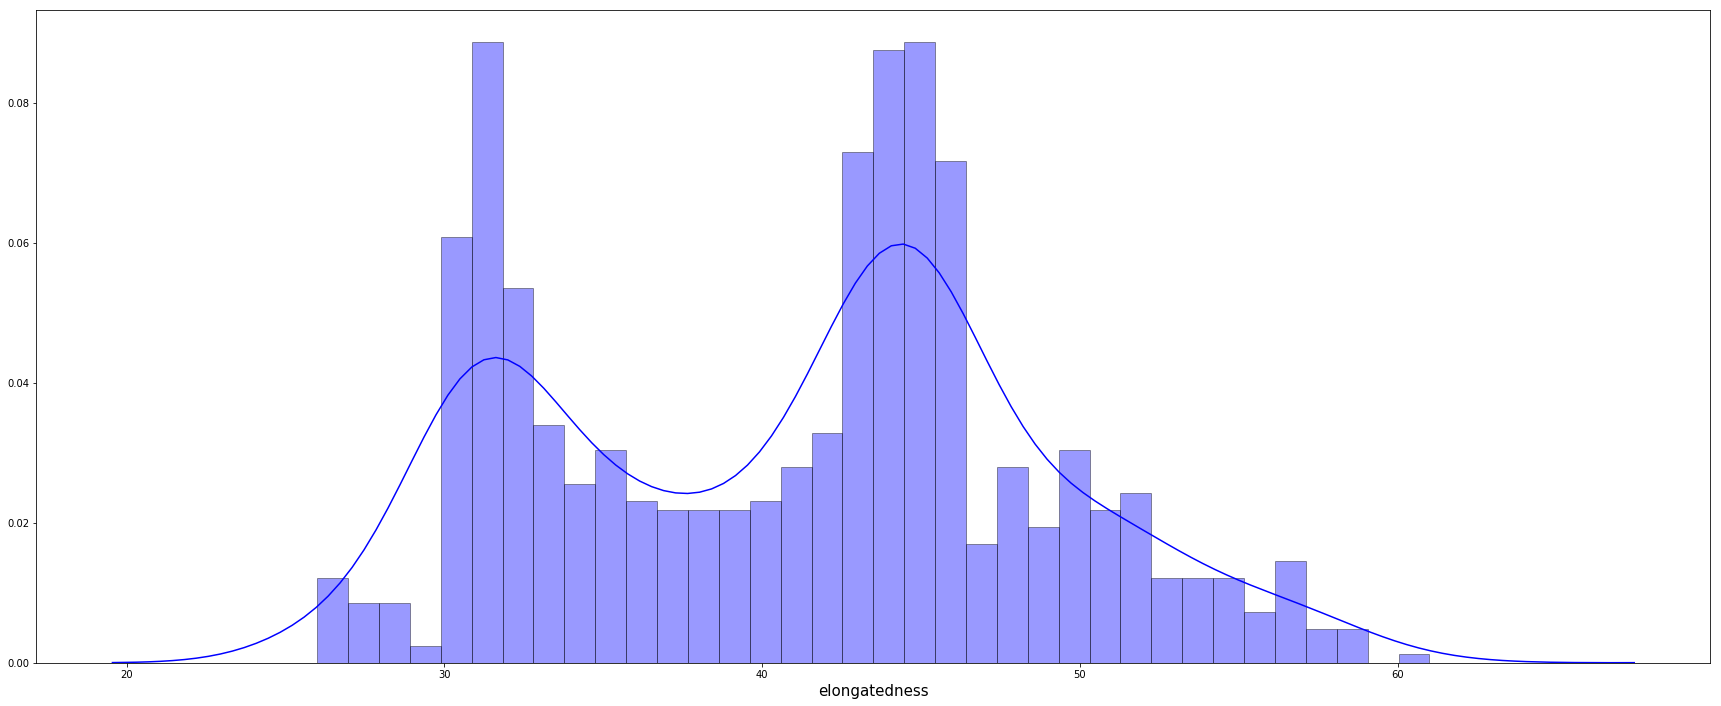

In [182]:
#Plotting Dist Plot of Age Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(clean_vehicle2['elongatedness'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('elongatedness', fontsize=15)

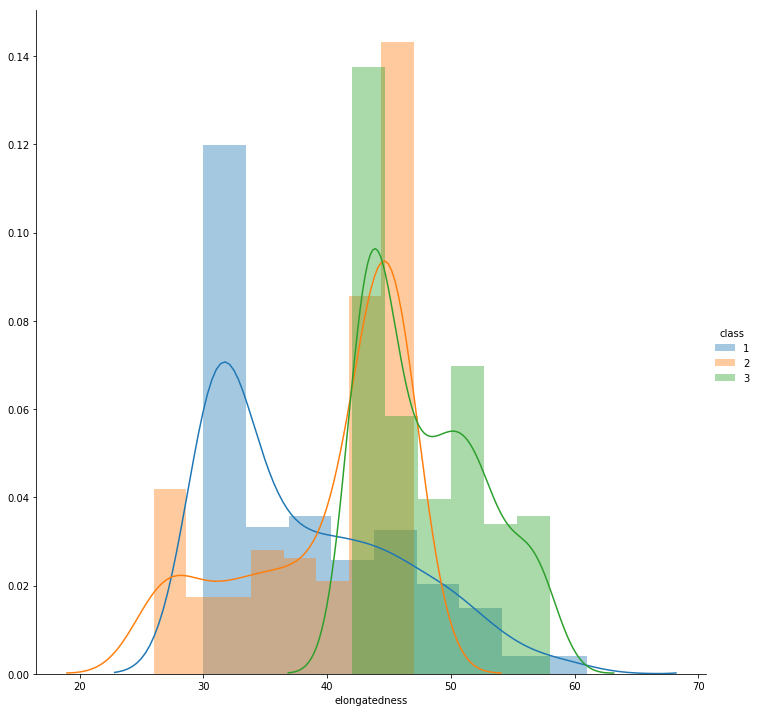

In [183]:
sns.FacetGrid(complete_data, hue = 'class', size = 10).map(sns.distplot, 'elongatedness').add_legend()

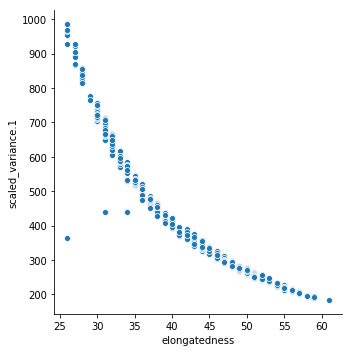

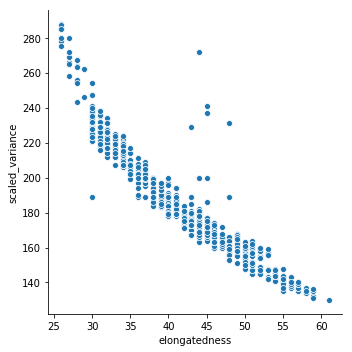

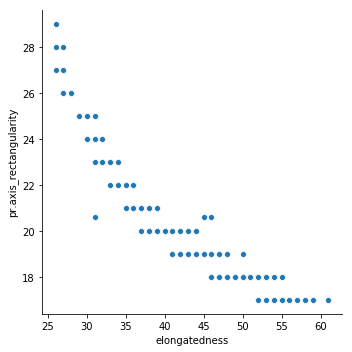

In [184]:
sns.relplot( x = "elongatedness", y = "scaled_variance.1", data = clean_vehicle2);
sns.relplot( x = "elongatedness", y = "scaled_variance", data = clean_vehicle2);
sns.relplot( x = "elongatedness", y = "pr.axis_rectangularity", data = clean_vehicle2);

#### pr.axis_rectangularity:

In [186]:
clean_vehicle2['pr.axis_rectangularity'].describe()

count    846.000000
mean      20.582444
std        2.588326
min       17.000000
25%       19.000000
50%       20.000000
75%       23.000000
max       29.000000
Name: pr.axis_rectangularity, dtype: float64

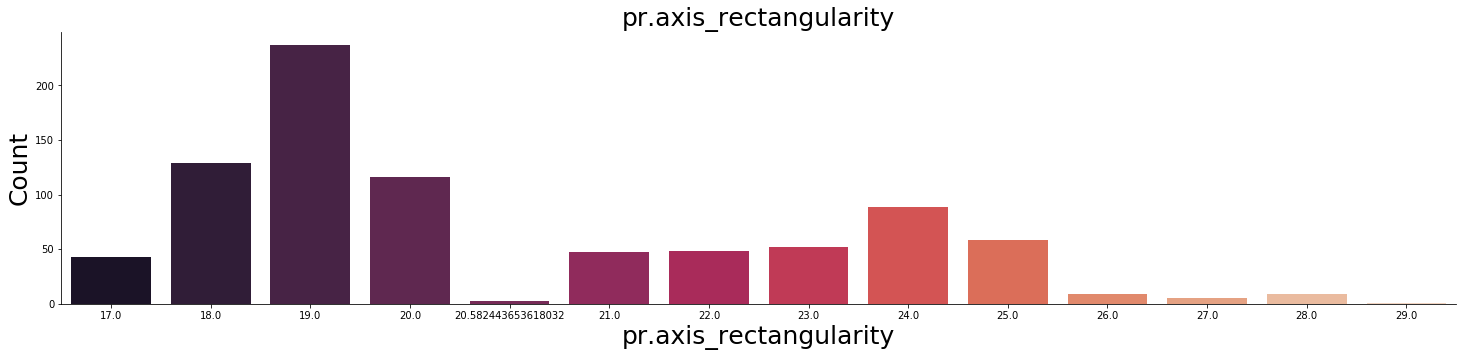

In [187]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'pr.axis_rectangularity',  palette="rocket", data = complete_data)
ax.set_xlabel('pr.axis_rectangularity', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('pr.axis_rectangularity', fontsize=25)
sns.despine()

Text(0.5, 0, 'pr.axis_rectangularity')

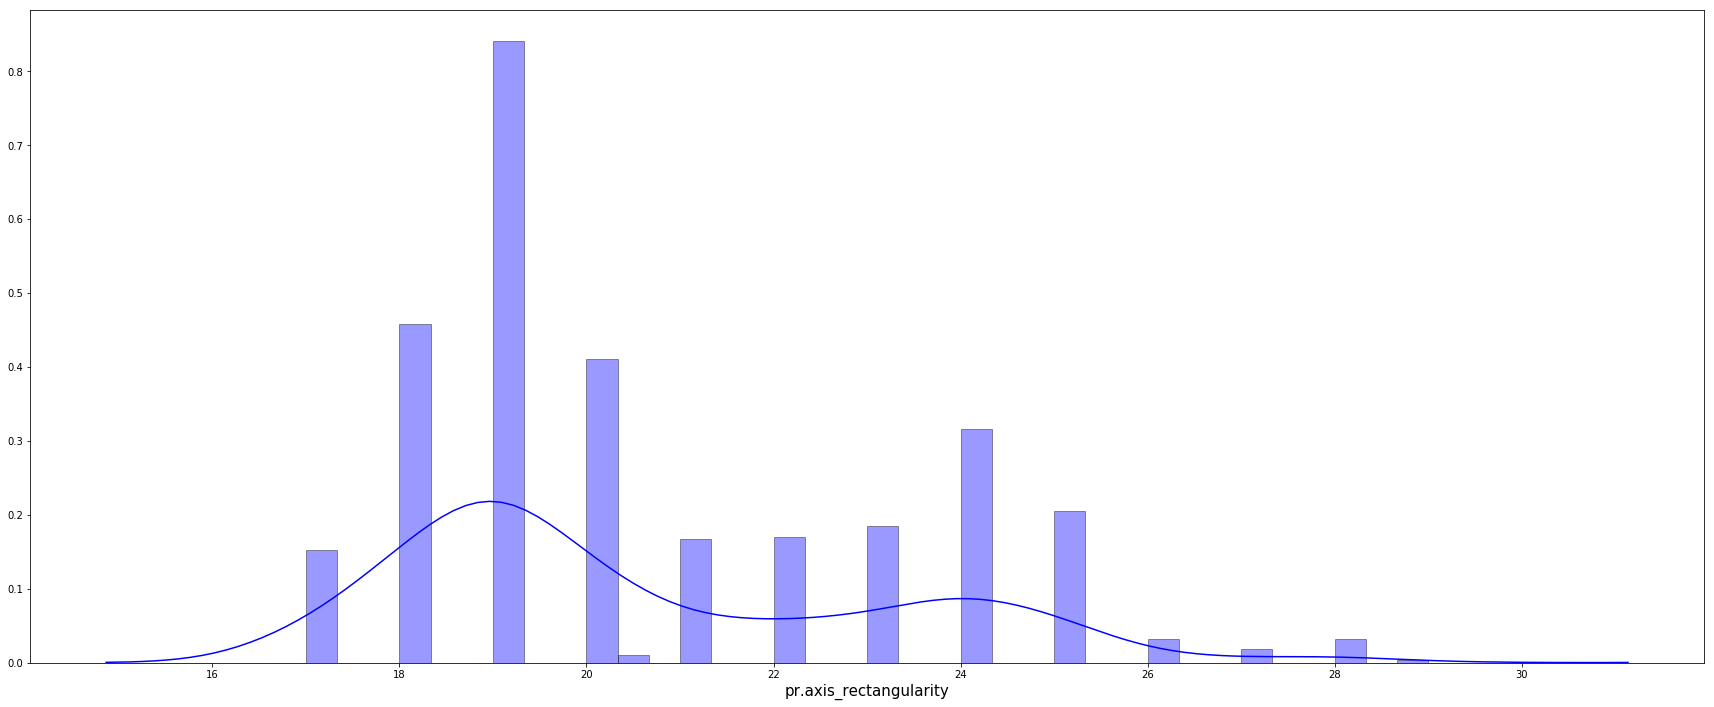

In [188]:
#Plotting Dist Plot of Age Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(clean_vehicle2['pr.axis_rectangularity'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('pr.axis_rectangularity', fontsize=15)

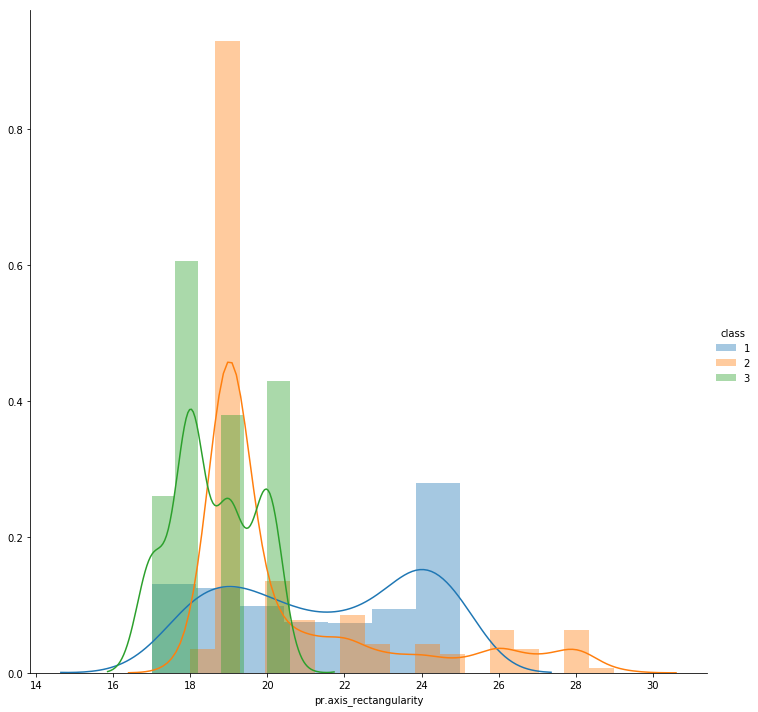

In [189]:
sns.FacetGrid(complete_data, hue = 'class', size = 10).map(sns.distplot, 'pr.axis_rectangularity').add_legend()

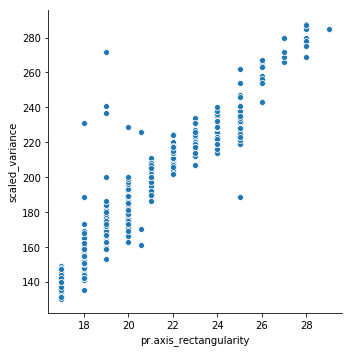

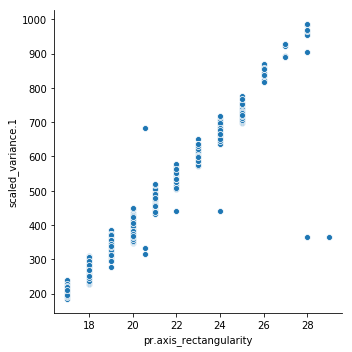

In [190]:
sns.relplot( x = "pr.axis_rectangularity", y = "scaled_variance", data = clean_vehicle2);
sns.relplot( x = "pr.axis_rectangularity", y = "scaled_variance.1", data = clean_vehicle2);

In [213]:
from scipy.stats import zscore
XScaled = clean_vehicle2.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.300420   
1    -0.325470    -0.624564              0.120112     -0.851200   
2     1.254193     0.843549              1.518571      1.265291   
3    -0.082445    -0.624564             -0.007021     -0.290952   
4    -1.054545    -0.135193             -0.769817      1.140792   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.932830                 0.910934      -0.208038   
1             -0.740875                 0.428675      -0.599893   
2              0.863348                 0.910934       1.148382   
3              0.328607                 0.428675      -0.750606   
4             -0.027887                -0.053584      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401938          -0.338519                   0.285618   
1        -0.595419          -0.619796                  -0.513719   
2         1.113664           1.131015                   1.392391   
3        -0.917888          -0.740344                  -1.466773   
4         1.694107          -0.648498                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.317988       -0.032895          0.386956   
1                     0.006954        0.623522          0.161529   
2                     0.169425        1.717551         -0.402038   
3                    -1.455286       -0.032895         -0.289325   
4                     0.006954        0.623522         -0.176611   

   skewness_about.2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181


#### Finding Top 12 Features: Features Selection
Here we are having 18 features and 846 records. We are likely to have the Curse of Dimensionality. 

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the "SelectKBest class" that can be used with a suite of different statistical tests to select a specific number of features.

So, I am using chi-squared (chi²) statistical test to select 15 of the best features from the Dataset.

In [212]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = clean_vehicle2  #independent columns
y = vehicle_df["class"]    #target column 
#apply SelectKBest class to extract top 12 best features
bestfeatures = SelectKBest(score_func = chi2, k = 12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 12 best features

                          Specs         Score
11            scaled_variance.1  12689.166208
6                 scatter_ratio   1257.176868
3                  radius_ratio   1030.705336
10              scaled_variance    887.632195
2          distance_circularity    501.533755
12    scaled_radius_of_gyration    454.183797
15             skewness_about.1    444.688972
7                 elongatedness    326.346269
5       max.length_aspect_ratio    105.039678
14               skewness_about     85.882744
13  scaled_radius_of_gyration.1     82.215118
0                   compactness     59.506366


In [214]:
new_vehicle = clean_vehicle2.drop(columns =['circularity', 'pr.axis_aspect_ratio', 'pr.axis_rectangularity', 'max.length_rectangularity', 'skewness_about.2', 'hollows_ratio'])
XScaled_new = new_vehicle.apply(zscore)
XScaled_new.head()

compactness  distance_circularity  radius_ratio  max.length_aspect_ratio  \
0     0.160580              0.056545      0.300420                 0.910934   
1    -0.325470              0.120112     -0.851200                 0.428675   
2     1.254193              1.518571      1.265291                 0.910934   
3    -0.082445             -0.007021     -0.290952                 0.428675   
4    -1.054545             -0.769817      1.140792                -0.053584   

   scatter_ratio  elongatedness  scaled_variance  scaled_variance.1  \
0      -0.208038       0.136580        -0.401938          -0.338519   
1      -0.599893       0.520853        -0.595419          -0.619796   
2       1.148382      -1.144331         1.113664           1.131015   
3      -0.750606       0.648945        -0.917888          -0.740344   
4      -0.599893       0.520853         1.694107          -0.648498   

   scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
0                   0.285618                    -0.317988       -0.032895   
1                  -0.513719                     0.006954        0.623522   
2                   1.392391                     0.169425        1.717551   
3                  -1.466773                    -1.455286       -0.032895   
4                   0.408593                     0.006954        0.623522   

   skewness_about.1  
0          0.386956  
1          0.161529  
2         -0.402038  
3         -0.289325  
4         -0.176611

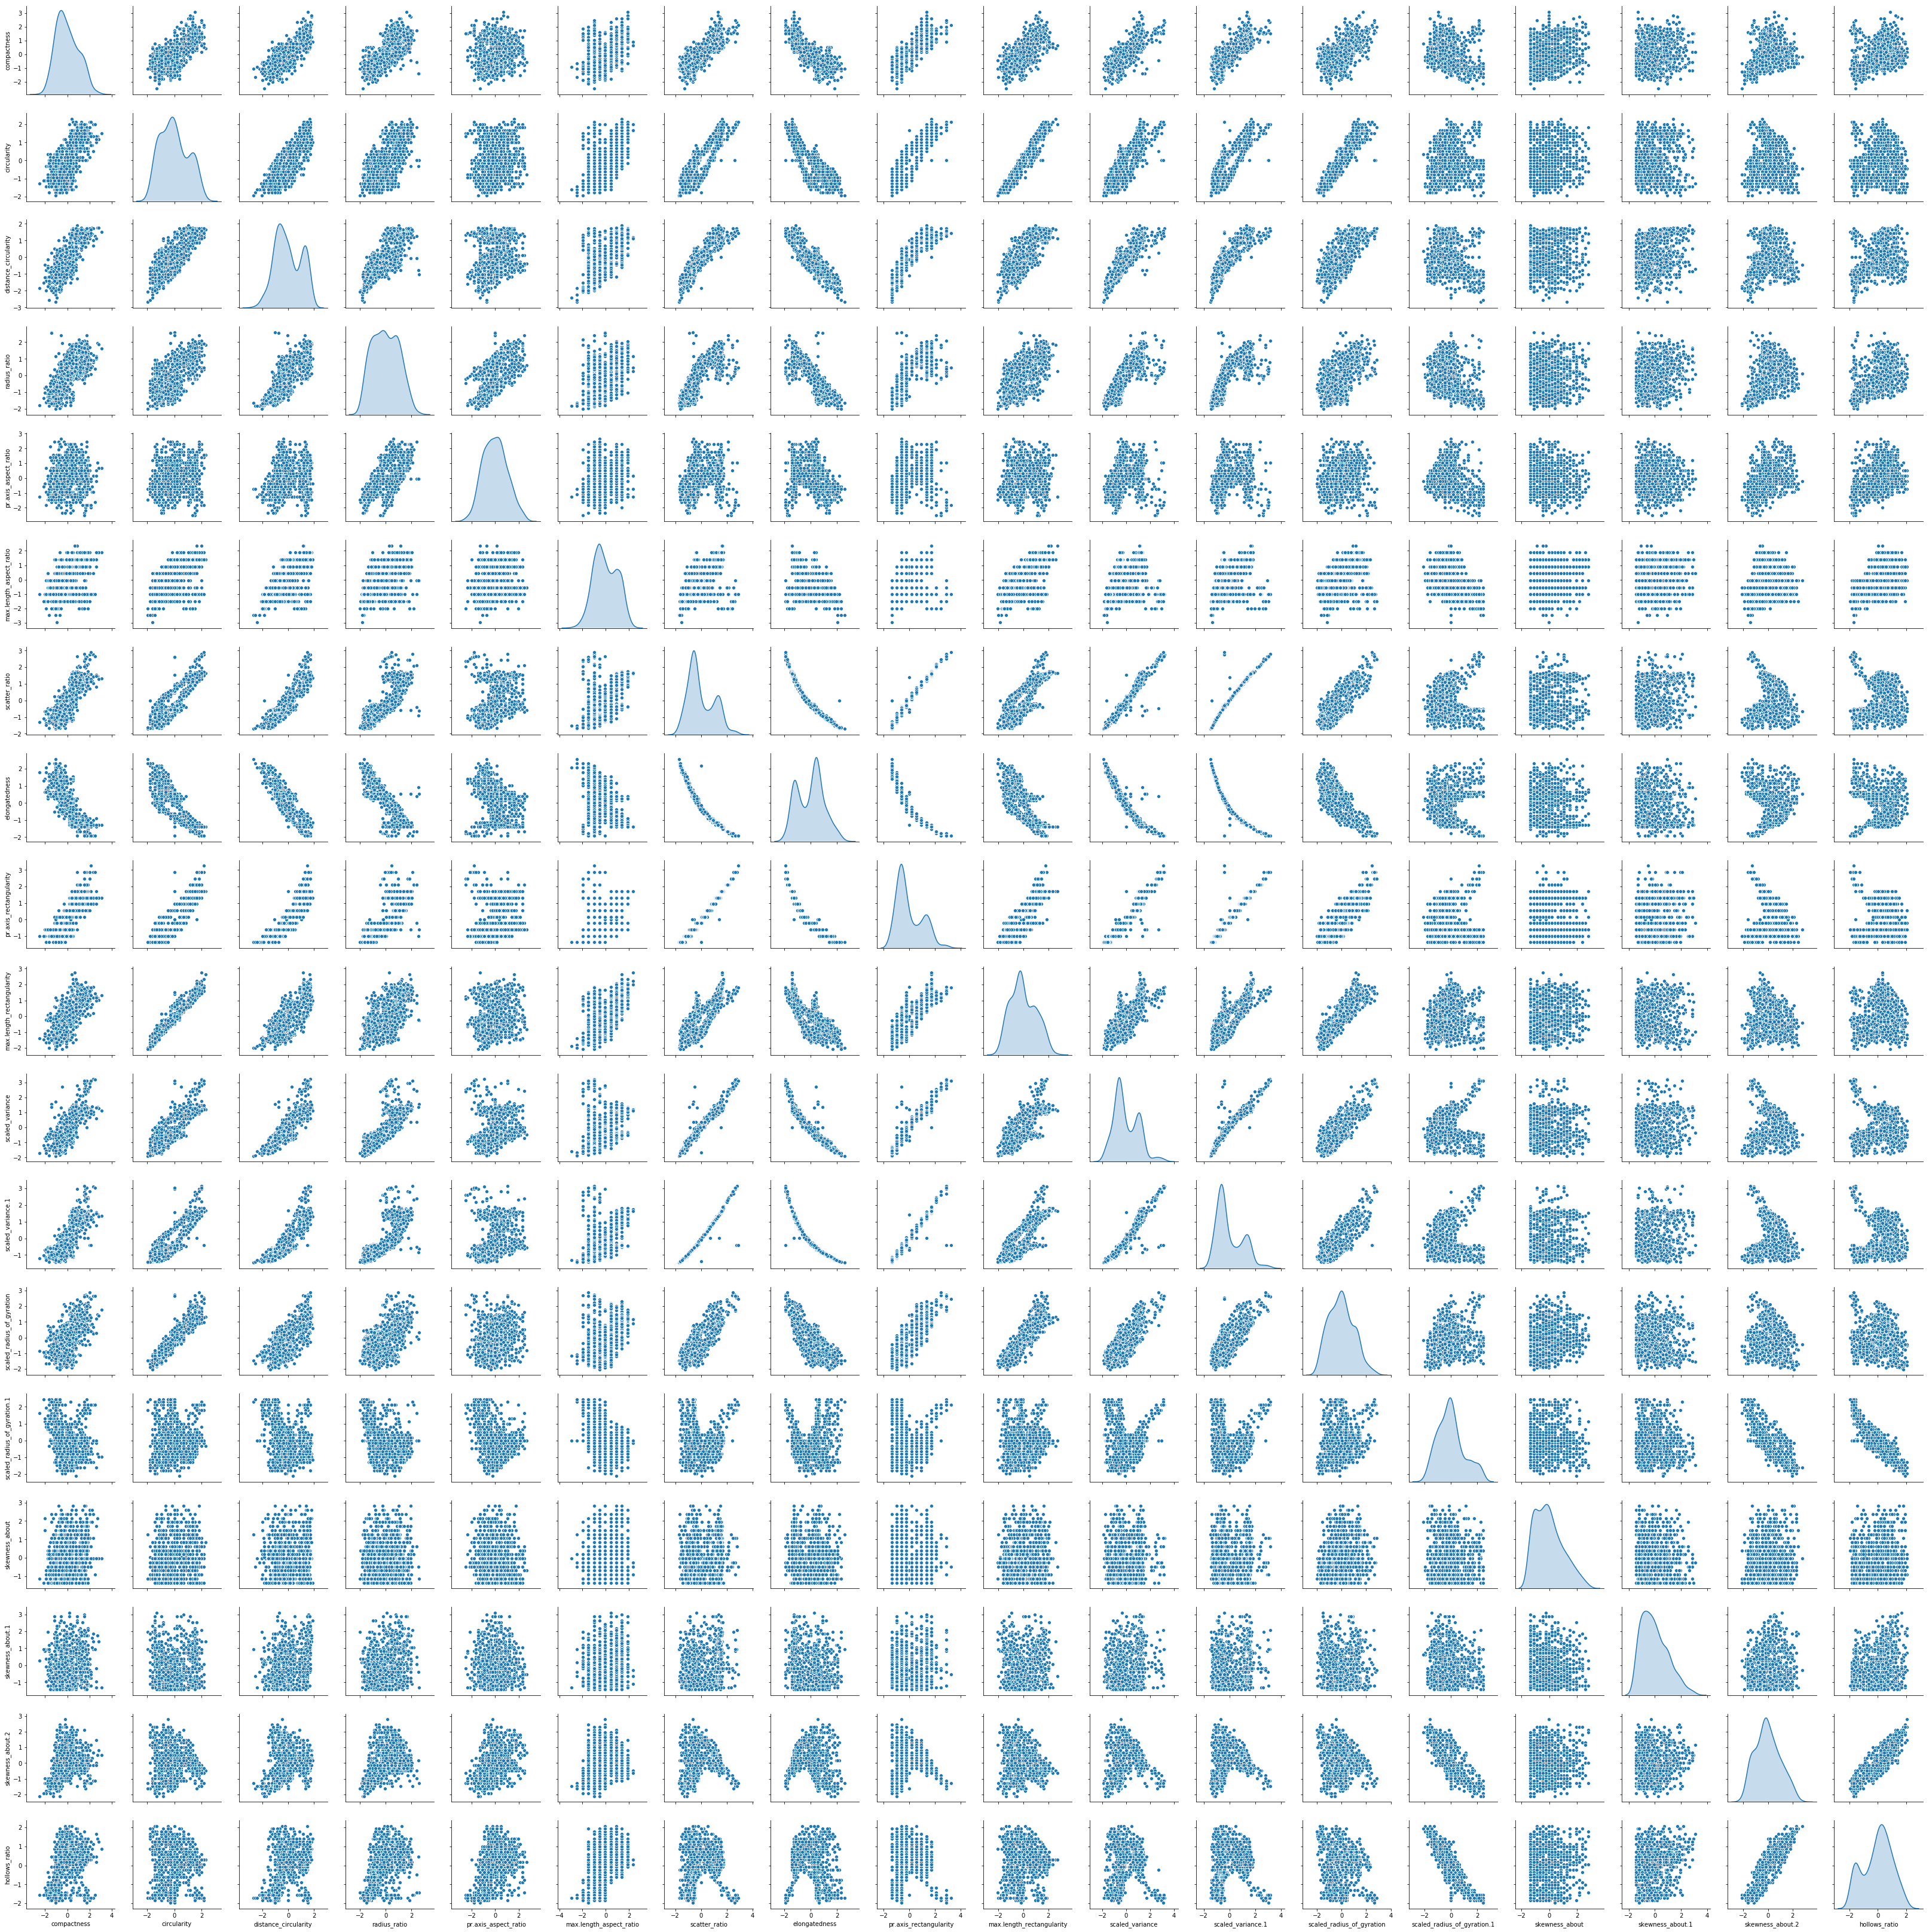

In [64]:
#Visually inspect the covariance between independent dimensions

sns.pairplot(XScaled, diag_kind='kde')

In [215]:
from sklearn.decomposition import PCA

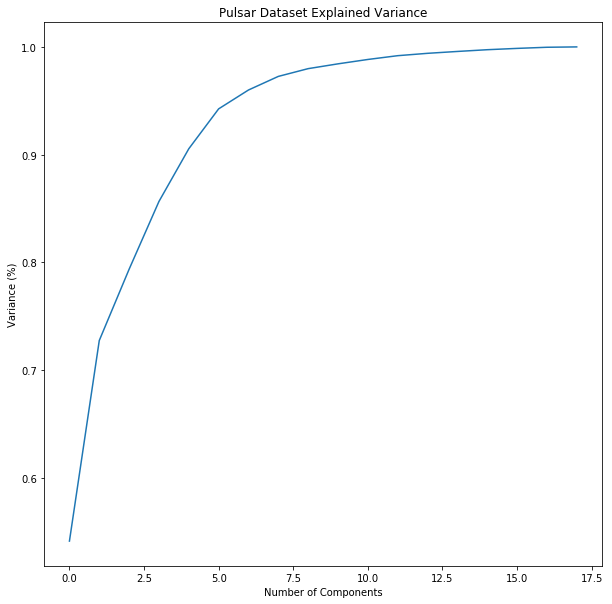

In [216]:
pca = PCA().fit(XScaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

###### This plot tells us that selecting 7 components we can preserve something around 96%  of the total variance of the data. 
###### It makes sense, we’ll not use 100% of our variance, because it denotes all components, and we want only the principal ones.

###### With this information in our hands, we can implement the PCA for 7 best components by using this snippet of code:

In [236]:
pca = PCA(n_components = 7, random_state = 1)
dataset = pca.fit_transform(XScaled)

In [237]:
print(pca.explained_variance_)

[9.75743663 3.35436922 1.19192215 1.13322309 0.88116755 0.66704838
 0.31558744]


In [238]:
print(pca.components_)
print('-----------------------------------------------------------------')
print(pca.explained_variance_ratio_)

[[ 0.2723812   0.28728344  0.30235057  0.26968514  0.09793422  0.19619864
   0.31020642 -0.30886528  0.3071766   0.27805755  0.29972096  0.30580442
   0.26308285 -0.04226169  0.03594258  0.05889654  0.03803009  0.08480514]
 [-0.08686503  0.13240898 -0.04582641 -0.19740181 -0.25748021 -0.10912442
   0.07536889 -0.01330144  0.08781196  0.1221501   0.07711951  0.07121928
   0.21077339  0.50372334 -0.01563753 -0.09287026 -0.5015759  -0.50747569]
 [-0.03617668 -0.2015136   0.0651636   0.05082256 -0.07370008 -0.13807298
   0.10893296 -0.08951572  0.10596565 -0.21202452  0.14319473  0.10911725
  -0.20462124  0.07086767 -0.55389301  0.67738716 -0.06437541 -0.03996837]
 [ 0.13919333 -0.03438759  0.10764416 -0.25521853 -0.61129892  0.27645635
   0.0039052   0.06651996  0.02908806  0.04486951 -0.06620116 -0.00362143
  -0.08143544 -0.11549378  0.48694096  0.41704533 -0.02485462  0.09634631]
 [ 0.13881492 -0.14066072 -0.08135285  0.13695822  0.12644415 -0.63613805
   0.08757963 -0.07982588  0.08230

In [239]:
Xpca7 = pca.transform(XScaled)
print(Xpca7)

[[ 0.5833835  -0.6763282  -0.4612454  ... -0.77744609 -1.84456347
  -0.18548236]
 [-1.51306248 -0.35189603 -0.30829859 ... -0.33901151 -0.12055814
   0.21223101]
 [ 3.9114274   0.23539233 -1.26715295 ...  0.91031019 -0.68679793
   0.80899166]
 ...
 [ 5.11845325 -0.18137698 -0.51579378 ... -1.30726434  0.17896642
   0.88073428]
 [-3.29681979 -1.10581221  1.94318245 ... -0.4963667   0.02079562
  -0.2619035 ]
 [-4.96766433  0.418556    1.31165819 ... -0.17914684  0.3833689
  -0.38987597]]


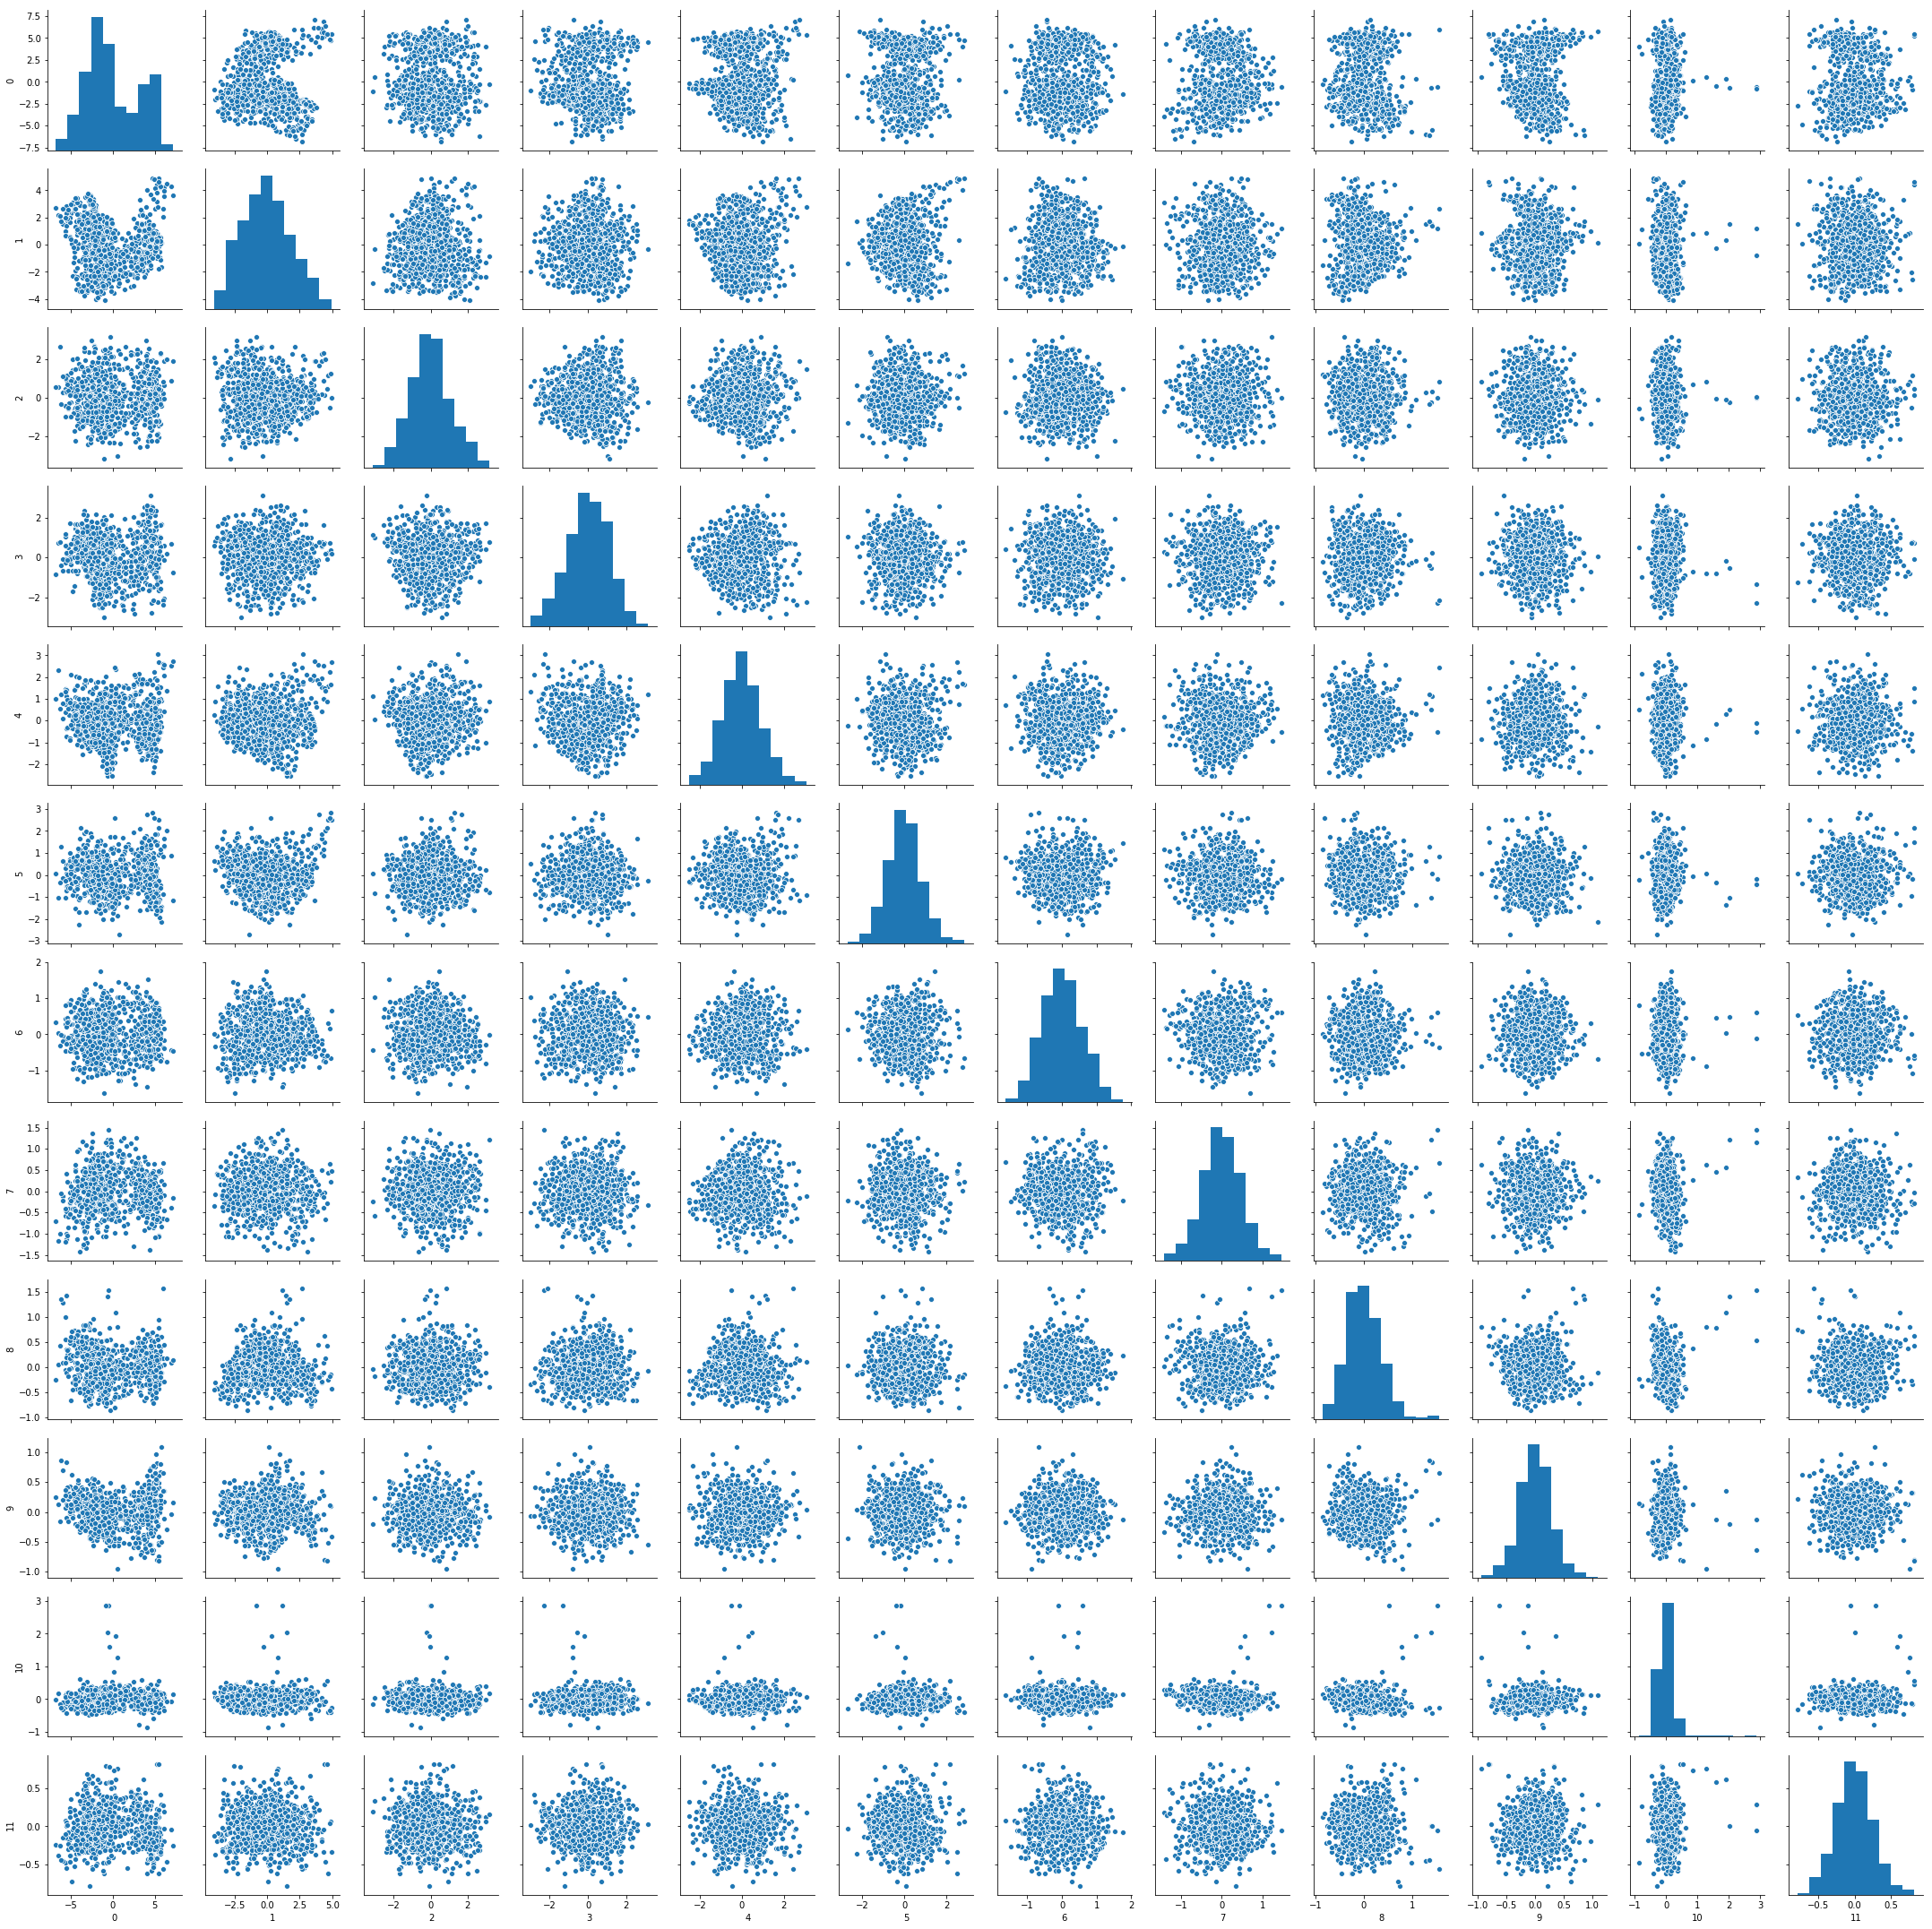

In [71]:
sns.pairplot(pd.DataFrame(Xpca12))

##### Constructing SVC Model with Feature Selection

In [223]:
X = XScaled_new
y = vehicle_df["class"]

svc_clf = SVC()
svc_clf.fit(X, y)
svc_score = svc_clf.score(X, y)
print('Overall Acuracy: ', svc_score)

Overall Acuracy:  0.942080378250591


###### Constructing SVC Model with Dimensionality Reduction Technique: PCA

In [240]:
X1 = Xpca7
y = vehicle_df["class"]

svc_clf = SVC()
svc_clf.fit(X1, y)
svc_score = svc_clf.score(X1, y)
print('Overall Acuracy: ', svc_score)
                  

Overall Acuracy:  0.9609929078014184


##### Thus by implementing PCA, accuracy of our model increased by almost 4% significantly.


##### Implementing Optimal Grid Search and hypertuning Our SVC model

In [225]:
from sklearn.model_selection import GridSearchCV

In [241]:
param_grid = {'C':[0.01, 0.05, 0.5, 1], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)

# Fitting the Tuned Model

grid.fit(X1, y)

grid_score = grid.score(X1, y)
print('Overall Acuracy: ', grid_score)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   0.1s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   0.1s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................ C=0.01, kernel=linear, total=   0.1s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.2s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.1s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............................ C=0.05, kernel=linear, total=   0.1s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............................ C=0.05, kernel=linear, total=   0.1s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............................ C=0.05, kernel=linear, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    3.1s finished


Overall Acuracy:  0.9609929078014184


###### Accuracy obtained by Optimal Grid Search is almost same as obtained by PCA SVC Model.

In [242]:
grid_scores = cross_val_score(grid, X1, y, cv = 3)
print('Cross Val Score: ', grid_scores.mean())

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.1s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............................ C=0.05, kernel=linear, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............................ C=0.05, kernel=linear, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............................ C=0.05, kernel=linear, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ............................... C=0.05, kernel=rbf, total=   0.1s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.1s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............................ C=0.05, kernel=linear, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............................ C=0.05, kernel=linear, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.1s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............................ C=0.05, kernel=linear, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............................ C=0.05, kernel=linear, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.7s finished


#### Thus, implementing PCA betters the Performance of the Model. It is because:

1. PCA Removes Correlated Features: In a real world scenario, this is very common that we got 18 features in our dataset. We cannot run algorithm on all the features as it will reduce the performance of the algorithm and it will not be easy to visualize that many features in any kind of graph. So, we MUST reduce the number of features in our dataset. 

After implementing the PCA on your dataset, all the Principal Components are independent of one another. There is no correlation among them.

2. PCA Improves Algorithm Performance: With so many features, the performance of the algorithm will drastically degrade. So, PCA is used to speed up Machine Learning algorithm by getting rid of correlated variables which don't contribute in any decision making. The processing time of the algorithms reduces significantly with less number of features.

So, if the input dimensions are too high, use of PCA speeds up the algorithm. 

3. PCA Reduces Overfitting: Overfitting mainly occurs when there are too many variables in the dataset. So, PCA helps in overcoming the overfitting issue by reducing the number of features.

4. PCA Improves Visualization: It is very hard to visualize and understand the data in high dimensions. PCA transforms a high dimensional data to low dimensional data so that it can be visualized easily. 